In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle_telco as wt
import wrangle as wr


## 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
# Acquiring data
telco = wt.get_telco_data()
telco.head()

Using cached csv...


,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


### Cleaning data

In [3]:
#Dropping potential duplicates
telco.drop_duplicates(inplace = True)
    
#Removing leading and trailing spaces
telco['total_charges'] = telco['total_charges'].str.strip()
#Removing rows where tenure and total_charges = 0
telco = telco[telco.total_charges != '']
#Changing total_charges to appropriate data type
telco['total_charges'] = telco.total_charges.astype(float)

#Dropping duplicate columns
columns_to_drop = ['contract_type_id', 'payment_type_id', 'internet_service_type_id']
telco = telco.drop(columns = columns_to_drop)

In [4]:
# Sanity check
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7032 non-null   object 
 1   gender                 7032 non-null   object 
 2   senior_citizen         7032 non-null   int64  
 3   partner                7032 non-null   object 
 4   dependents             7032 non-null   object 
 5   tenure                 7032 non-null   int64  
 6   phone_service          7032 non-null   object 
 7   multiple_lines         7032 non-null   object 
 8   online_security        7032 non-null   object 
 9   online_backup          7032 non-null   object 
 10  device_protection      7032 non-null   object 
 11  tech_support           7032 non-null   object 
 12  streaming_tv           7032 non-null   object 
 13  streaming_movies       7032 non-null   object 
 14  paperless_billing      7032 non-null   object 
 15  mont

### Splitting Data

In [5]:
train_validate, test = train_test_split(telco, test_size=.2, random_state=123)

train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

train.shape, validate.shape, test.shape

((3937, 21), (1688, 21), (1407, 21))

## 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [6]:
#Creating a variable with only relevant columns
cols = ['tenure', 'monthly_charges', 'total_charges']

In [7]:
#Creating function using seaborn pairplot
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

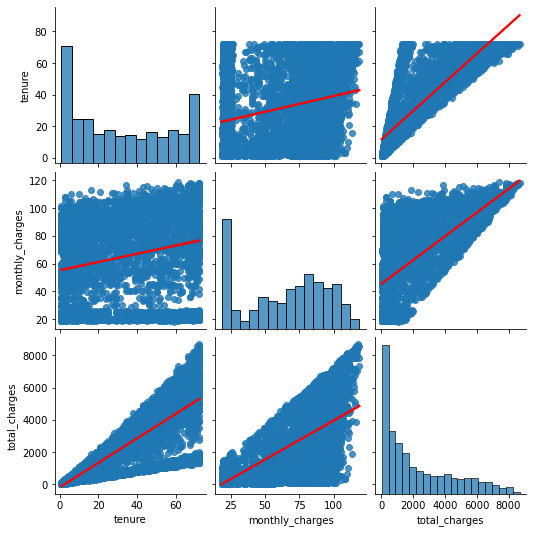

In [8]:
plot_variable_pairs(train[cols])

## 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [12]:
def month_to_years(df):
    df['tenure_years'] = round(df.tenure/ 12, 0)
    df['tenure_years'] = df.tenure_years.astype(int)
    return df

In [13]:
# Testing function
month_to_years(train)
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years
5408,7619-PLRLP,Female,0,Yes,No,53,Yes,Yes,Yes,Yes,...,No,Yes,No,74.10,3833.95,No,One year,Bank transfer (automatic),DSL,4
2883,4111-BNXIF,Female,0,Yes,Yes,67,No,No phone service,No,Yes,...,Yes,Yes,Yes,59.55,4103.90,No,Two year,Electronic check,DSL,6
659,0963-ZBDRN,Male,0,No,No,32,Yes,No,No,No,...,Yes,Yes,Yes,96.20,3183.40,Yes,Month-to-month,Electronic check,Fiber optic,3
5848,8224-DWCKX,Male,1,No,No,12,Yes,Yes,No,No,...,No,No,Yes,73.30,828.05,No,Month-to-month,Credit card (automatic),Fiber optic,1
2234,3194-ORPIK,Female,0,Yes,Yes,50,Yes,Yes,No,No,...,Yes,No,Yes,84.40,4116.15,Yes,Month-to-month,Bank transfer (automatic),Fiber optic,4


In [14]:
# sanity check
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5408 to 6337
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            3937 non-null   object 
 1   gender                 3937 non-null   object 
 2   senior_citizen         3937 non-null   int64  
 3   partner                3937 non-null   object 
 4   dependents             3937 non-null   object 
 5   tenure                 3937 non-null   int64  
 6   phone_service          3937 non-null   object 
 7   multiple_lines         3937 non-null   object 
 8   online_security        3937 non-null   object 
 9   online_backup          3937 non-null   object 
 10  device_protection      3937 non-null   object 
 11  tech_support           3937 non-null   object 
 12  streaming_tv           3937 non-null   object 
 13  streaming_movies       3937 non-null   object 
 14  paperless_billing      3937 non-null   object 
 15  m

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.